In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [5]:
test1 = pd.read_csv('/kaggle/input/fml-project/testD1.csv')
test2 = pd.read_csv('/kaggle/input/fml-project/testD2.csv')
test3 = pd.read_csv('/kaggle/input/fml-project/testD3.csv')
test4 = pd.read_csv('/kaggle/input/fml-project/testD42_-5percent.csv')
test5 = pd.read_csv('/kaggle/input/fml-project/testD42_-50percent.csv')
test_datasets = [test1, test2, test3, test4, test5]

for i, test_data in enumerate(test_datasets, start=1):
    test_data.drop('ID', axis = 1, inplace = True)
train = pd.read_csv('/kaggle/input/fml-project/trainD0.csv')
train.drop('ID', axis = 1, inplace = True)
train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1007,feature_1008,feature_1009,feature_1010,feature_1011,feature_1012,feature_1013,feature_1014,feature_1015,label
0,0.014024,0.017395,0.026160,0.032497,0.037217,0.038700,0.036677,0.029531,0.025485,0.021575,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000135,1
1,0.005939,0.007515,0.008485,0.008485,0.010182,0.009091,0.009939,0.008485,0.008242,0.006788,...,0.000000,0.000000,0.000000,0.0,0.000121,0.000000,0.0,0.000121,0.000000,2
2,0.005947,0.005055,0.003866,0.004758,0.006542,0.002974,0.004163,0.004460,0.005055,0.004163,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000297,0.0,0.000000,0.000000,2
3,0.012405,0.015606,0.021008,0.026811,0.030612,0.032213,0.029212,0.024410,0.021208,0.017007,...,0.000200,0.000000,0.000200,0.0,0.000200,0.000000,0.0,0.000000,0.000000,1
4,0.004768,0.002818,0.003468,0.003901,0.003901,0.002818,0.002818,0.005202,0.002818,0.002818,...,0.000000,0.000000,0.000217,0.0,0.000217,0.000000,0.0,0.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.005476,0.006420,0.005287,0.006609,0.010008,0.011707,0.010196,0.008497,0.009441,0.004343,...,0.000000,0.000189,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2
3996,0.015224,0.019195,0.027006,0.029124,0.034286,0.037199,0.036140,0.032963,0.025947,0.018533,...,0.000132,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000132,1
3997,0.012557,0.010845,0.025114,0.024543,0.031393,0.031963,0.029110,0.028539,0.023402,0.018836,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
3998,0.006383,0.007164,0.007164,0.008206,0.008727,0.010681,0.009248,0.008988,0.007946,0.005731,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000130,0.0,0.000000,0.000130,2


In [6]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1007,feature_1008,feature_1009,feature_1010,feature_1011,feature_1012,feature_1013,feature_1014,feature_1015,label
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.006524,0.007868,0.008974,0.010016,0.010758,0.011005,0.010817,0.009846,0.008483,0.007020,...,0.000039,0.000035,0.000036,0.000028,0.000027,0.000039,0.000026,0.000052,0.000048,1.499250
std,0.003447,0.005050,0.007274,0.009494,0.011248,0.011813,0.011337,0.009884,0.007692,0.005562,...,0.000118,0.000113,0.000109,0.000099,0.000096,0.000122,0.000092,0.000150,0.000134,1.116831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004261,0.004651,0.004310,0.003874,0.003501,0.003274,0.003368,0.003328,0.003429,0.003338,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.005432,0.006010,0.005962,0.005676,0.005235,0.005070,0.005310,0.005094,0.004941,0.004680,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.007523,0.008495,0.009265,0.010228,0.010914,0.011176,0.011183,0.010153,0.009200,0.007833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,0.020599,0.032064,0.043053,0.050710,0.056795,0.054108,0.056112,0.048193,0.037456,0.034549,...,0.001965,0.002012,0.002070,0.002105,0.002101,0.002004,0.002066,0.002092,0.001992,3.000000


In [7]:
train.shape

(4000, 1017)

In [8]:
X = train.drop(columns=['label']).values  # Features
X = X[:, :600]
y = train['label'].values  # Target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)  
# Create dataset and data loader
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.output = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.output(x)
        return x

# Initialize model, loss, and optimizer
input_size = X.shape[1]
num_classes = len(set(y))
model = NeuralNet(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 9
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch [1/9], Loss: 0.1014
Epoch [2/9], Loss: 0.0325
Epoch [3/9], Loss: 0.1244
Epoch [4/9], Loss: 0.0009
Epoch [5/9], Loss: 0.0001
Epoch [6/9], Loss: 0.0003
Epoch [7/9], Loss: 0.0002
Epoch [8/9], Loss: 0.0000
Epoch [9/9], Loss: 0.0000
Test Accuracy: 96.75%


Test Dataset 1 Accuracy: 95.03%


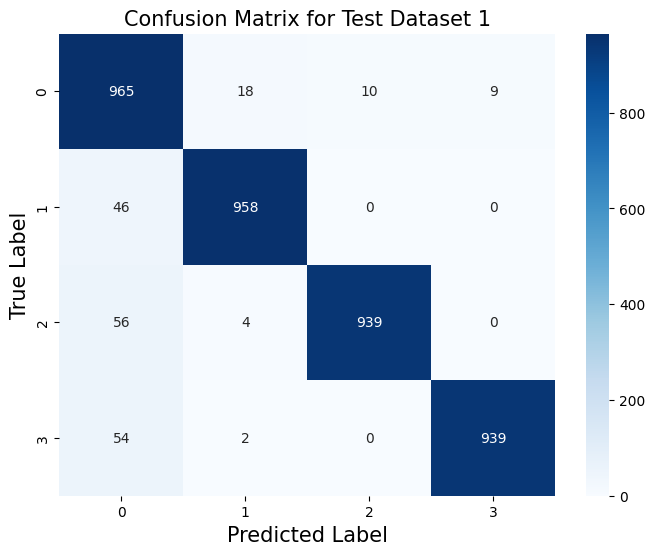

Test Dataset 2 Accuracy: 99.75%


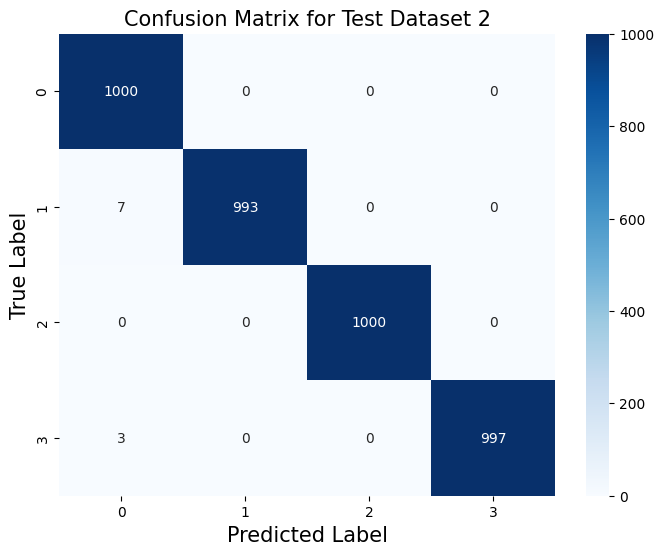

Test Dataset 3 Accuracy: 99.17%


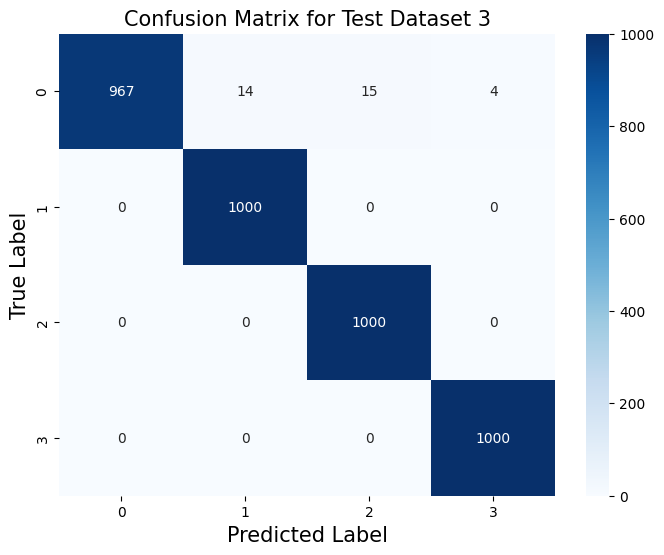

Test Dataset 4 Accuracy: 93.08%


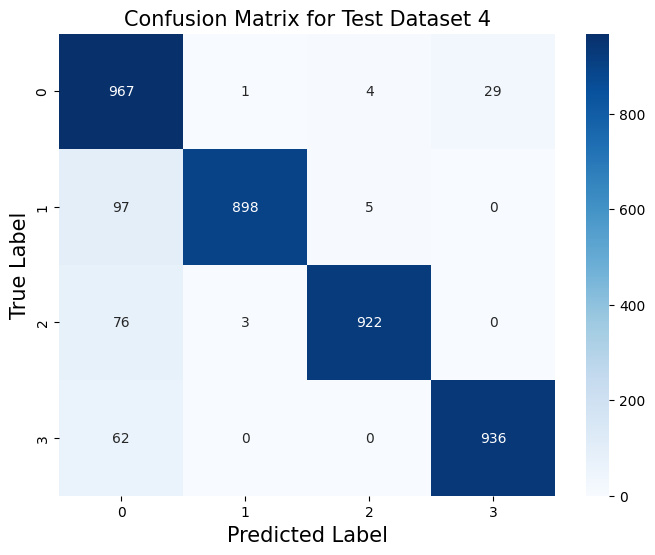

Test Dataset 5 Accuracy: 24.30%


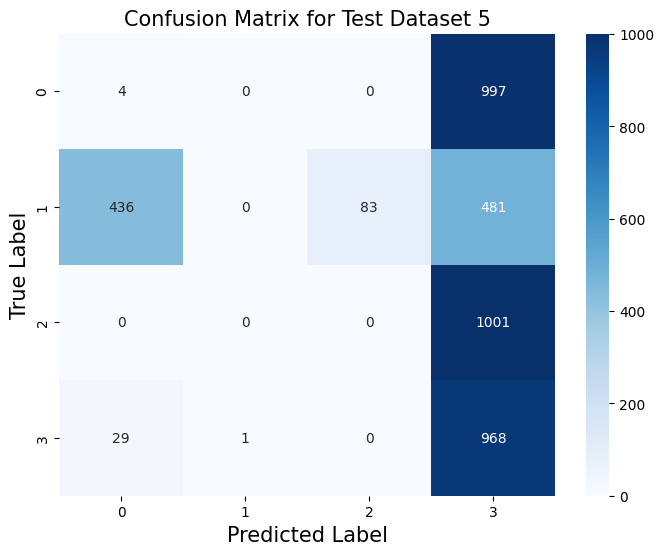

In [9]:
for i, test_data in enumerate(test_datasets, start=1):
    # Prepare the test data (assuming similar format as train data)
    X_test = test_data.drop(columns=['label']).values
    X_test = X_test[:, :600]
    y_test = test_data['label'].values
    X_test = scaler.transform(X_test)  # Use the same scaler from training
    
    # Convert to tensors
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)
    
    # Collect predictions and true labels
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    # Compute confusion matrix and accuracy
    cm = confusion_matrix(all_labels, all_preds)
    accuracy = accuracy_score(all_labels, all_preds)
    
    # Print accuracy
    print(f'Test Dataset {i} Accuracy: {accuracy * 100:.2f}%')
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel("Predicted Label", fontsize = 15)
    plt.ylabel("True Label", fontsize = 15)
    plt.title(f'Confusion Matrix for Test Dataset {i}', fontsize = 15)
    plt.savefig(f'Confusion Matrix for Test Dataset {i}.png', dpi = 600)
    plt.show()

**UP to this**

In [10]:
X = train.drop(columns=['label']).values  # Features
X = X[:, :600]  # Limit to first 350 features
y = train['label'].values  # Target
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long) 



dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class CNN1D(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CNN1D, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5, stride=2, padding=2) 
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2)  # Further reduces length by half
        
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5, stride=2, padding=2) 
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2)

        self.con31 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=2, padding=2) 
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool1d(kernel_size=2)  # Further reduces length by half
        
        with torch.no_grad():
            sample_input = torch.zeros(1, 1, input_dim) 
            sample_output = self.pool2(self.relu2(self.conv2(self.pool1(self.relu1(self.conv1(sample_input))))))
            self.flatten_dim = sample_output.view(1, -1).size(1)
        
        
        self.fc1 = nn.Linear(self.flatten_dim, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = x.unsqueeze(1)  
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        
        
        x = x.view(x.size(0), -1)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        
        return x

# Model, loss, and optimizer
input_size = X.shape[1]
num_classes = len(set(y))
model = CNN1D(input_dim=input_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%')
    

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    val_accuracy = 100 * correct / total
    print(f'Validation Loss: {val_loss/len(test_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%')



Epoch [1/10], Loss: 0.2842, Accuracy: 90.56%
Validation Loss: 0.1015, Validation Accuracy: 96.50%
Epoch [2/10], Loss: 0.0956, Accuracy: 96.91%
Validation Loss: 0.1031, Validation Accuracy: 96.50%
Epoch [3/10], Loss: 0.0668, Accuracy: 97.66%
Validation Loss: 0.0837, Validation Accuracy: 97.50%
Epoch [4/10], Loss: 0.0318, Accuracy: 99.00%
Validation Loss: 0.0753, Validation Accuracy: 98.12%
Epoch [5/10], Loss: 0.0260, Accuracy: 99.12%
Validation Loss: 0.0710, Validation Accuracy: 97.75%
Epoch [6/10], Loss: 0.0173, Accuracy: 99.47%
Validation Loss: 0.0987, Validation Accuracy: 97.50%
Epoch [7/10], Loss: 0.0150, Accuracy: 99.62%
Validation Loss: 0.0836, Validation Accuracy: 97.75%
Epoch [8/10], Loss: 0.0154, Accuracy: 99.53%
Validation Loss: 0.0726, Validation Accuracy: 97.88%
Epoch [9/10], Loss: 0.0066, Accuracy: 99.91%
Validation Loss: 0.0712, Validation Accuracy: 98.38%
Epoch [10/10], Loss: 0.0041, Accuracy: 99.97%
Validation Loss: 0.0845, Validation Accuracy: 98.12%


In [11]:
data = {}
for i in range(4):
    data[i] = train[train['label'] == i].iloc[[0,1,2],:]

In [12]:
data[1]

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1007,feature_1008,feature_1009,feature_1010,feature_1011,feature_1012,feature_1013,feature_1014,feature_1015,label
0,0.014024,0.017395,0.026160,0.032497,0.037217,0.038700,0.036677,0.029531,0.025485,0.021575,...,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.000135,1
3,0.012405,0.015606,0.021008,0.026811,0.030612,0.032213,0.029212,0.024410,0.021208,0.017007,...,0.0002,0.0,0.0002,0.0,0.0002,0.0,0.0,0.0,0.000000,1
6,0.012902,0.017203,0.027352,0.031825,0.033546,0.038534,0.034922,0.030621,0.026492,0.018579,...,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.000000,1


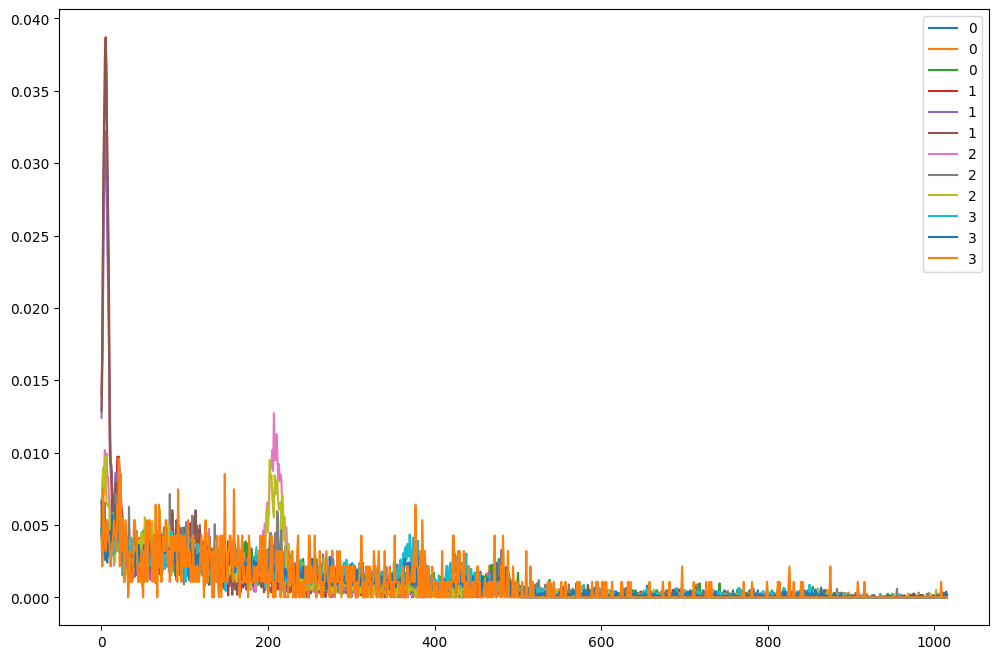

In [13]:
plt.figure(figsize = (12, 8))
for i in range(4):
    d = data[i]
    for j in range(3):
        y = d.iloc[j][:-1]
        x = np.arange(len(y))
        plt.plot(x, y, label = i)

plt.legend()
plt.show()


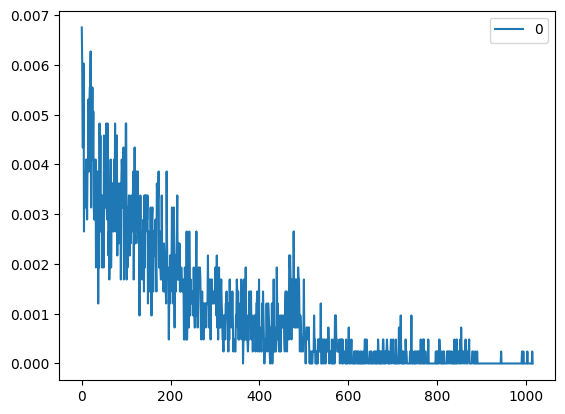

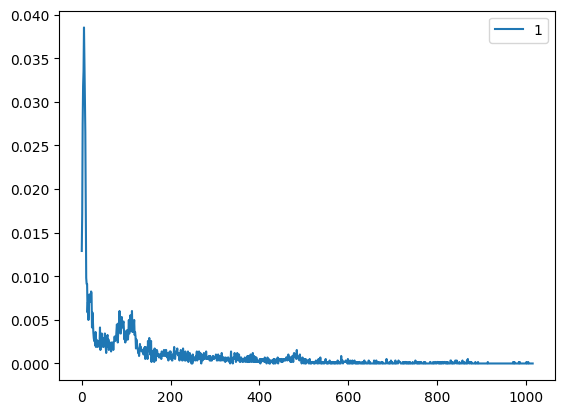

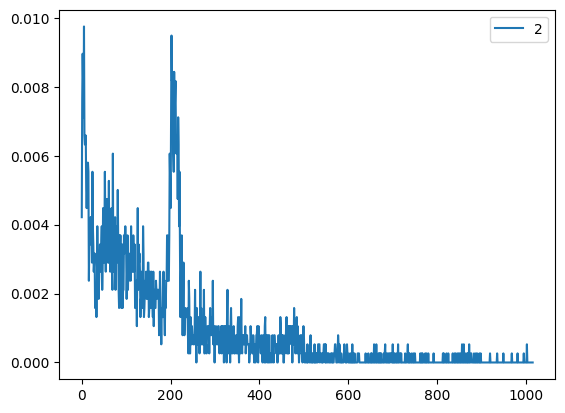

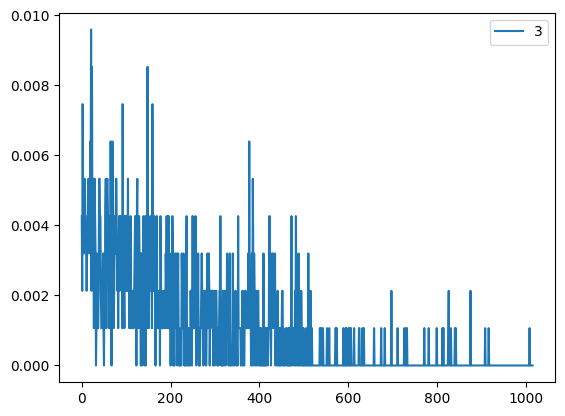

In [14]:
for i in range(4):
    z = data[i].iloc[2].values[:-1]
    plt.plot(np.arange(len(z)), z, label = i)
    plt.legend()
    plt.show()

In [15]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, compressed_dim, dropout_prob=0.3):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 750),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(750,500),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(500, 256),
            nn.ReLU(),
            nn.Linear(256, compressed_dim)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(compressed_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 750),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(750, input_dim)
        )

    def forward(self, x):
        compressed = self.encoder(x)
        reconstructed = self.decoder(compressed)
        return reconstructed, compressed

dataset = TensorDataset(X_tensor)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)
input_dim = X.shape[1]
compressed_dim = 500  # Target compressed dimension
autoencoder = Autoencoder(input_dim, compressed_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.0001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    for X_batch, in data_loader:
        # Forward pass
        reconstructed, _ = autoencoder(X_batch)
        loss = criterion(reconstructed, X_batch)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

autoencoder.eval()
with torch.no_grad():
    _, compressed_features = autoencoder(torch.tensor(X, dtype=torch.float32))


compressed_features = compressed_features.numpy()

print("Compressed feature shape:", compressed_features.shape)

Epoch [1/20], Loss: 0.8444
Epoch [2/20], Loss: 0.7558
Epoch [3/20], Loss: 0.6774
Epoch [4/20], Loss: 0.6054
Epoch [5/20], Loss: 1.1489
Epoch [6/20], Loss: 0.7063
Epoch [7/20], Loss: 0.8401
Epoch [8/20], Loss: 0.6940
Epoch [9/20], Loss: 0.7682
Epoch [10/20], Loss: 0.7656
Epoch [11/20], Loss: 0.8388
Epoch [12/20], Loss: 0.8768
Epoch [13/20], Loss: 0.7859
Epoch [14/20], Loss: 0.5807
Epoch [15/20], Loss: 0.7625
Epoch [16/20], Loss: 0.7540
Epoch [17/20], Loss: 0.6630
Epoch [18/20], Loss: 0.7159
Epoch [19/20], Loss: 0.6791
Epoch [20/20], Loss: 0.7448
Compressed feature shape: (4000, 500)


Explained Variance Ratio for each component:
[8.22758797e-02 3.88642078e-02 2.69686028e-02 ... 1.75746690e-05
 1.68219360e-05 5.70280237e-29]


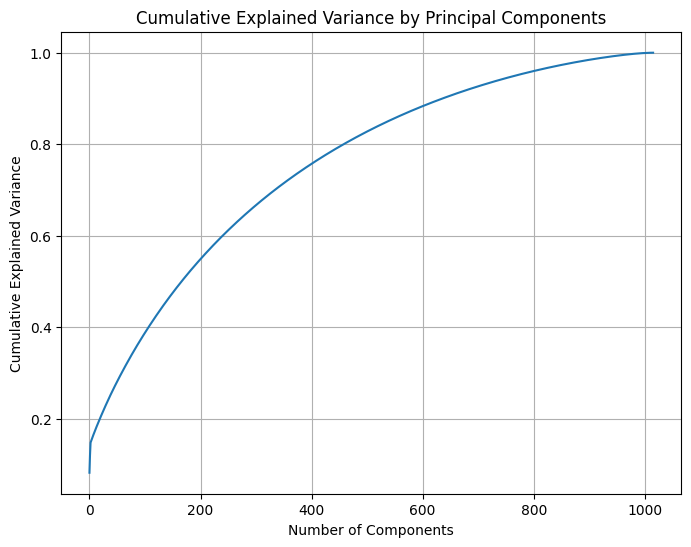

Variance explained by the first 3 components: 0.1481


In [16]:
X = train.drop(columns='label')  
y = train['label']  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)


plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Step 5: Print the total variance explained by the selected components
# For example, if you want to know how much variance is explained by the first 3 components:
n_components = 3
print(f"Variance explained by the first {n_components} components: {np.sum(pca.explained_variance_ratio_[:n_components]):.4f}")
